In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample #to handle imbalanced data
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score#to split the data and tune hyperparameters
from sklearn.ensemble import RandomForestClassifier#to build the model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score #to evaluate the model
import pickle #to save the model to a file
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.svm import SVC
from xgboost import XGBClassifier





In [30]:
data = pd.read_csv('Rainfall.csv')
data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [31]:
data.shape#(rows,columns)


(366, 12)

In [32]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [33]:
data.info()#summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [34]:
data.tail()#last 5 records

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9
365,31,1026.4,20.5,17.8,15.5,13.0,74,66,no,5.7,20.0,23.3


In [35]:
data['day'].unique() #unique values in 'day' column

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [36]:
#remove extra spaces from all columns
data.columns = data.columns.str.strip().str.lower()
data.info()#summary of the dataframe after removing spaces

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [37]:
data = data.drop(columns=['day'])#dropping date column as it is not needed for analysis
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [38]:
#missing values
data.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

In [39]:
data['winddirection'].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [40]:
#handling missing values by filling with mode
data['winddirection']=data['winddirection'].fillna(data['winddirection'].mode()[0]) 
#replacing with most frequent value for categorical column

In [41]:
data['windspeed'].unique()

array([26.3, 15.3, 14.2, 16.9, 13.7, 14.5, 21.5, 14.3, 39.3, 37.7, 23.3,
       23.9, 24.4, 33.2, 37.5, 40. , 23.4, 28.4, 38. , 50.6, 26.2, 35.3,
       55.5, 59.5, 28.7, 21.3, 29.6, 28.8, 25. , 21.2, 43.1, 31.9, 27.3,
        9.1, 44.7, 20.5, 16.7, 17.2, 22. , 15.8, 13.9, 10.2, 33.5, 23.5,
       19.2, 18.6, 22.2, 19.3, 28. , 20.4, 15.2,  9.2, 34.2, 27.1, 14.7,
       15.4, 13.3,  6.6, 13.8, 15.1, 39.7, 36. , 22.8, 26.7, 26.5, 13.1,
       12.5, 38.3, 42. , 19.4, 13.4, 14.6, 26.9, 14.8,  4.5,  8.3,  8. ,
       20. , 10. , 17.3, 31.8, 29.8, 11.2, 16. , 19.6, 20.9,  7.3, 11.1,
       13. ,  8.5, 24.2, 20.2, 30.5, 27. , 23.7, 11.8, 15.5, 12.1,  9.5,
       16.3, 12. , 26. , 28.6, 24.9, 28.3, 15.7, 21.9, 39.5, 30.3, 26.4,
       22.3, 25.9, 11.3,  7.9,  7.4, 16.2, 34.8, 32.5, 24. , 19. , 25.2,
       31.7, 27.4, 20.8,  9.8, 12.6,  nan, 24.3, 30. , 29.3, 23.2, 12.8,
       19.8, 12.4, 10.9,  9.6,  9. , 11.9, 26.1, 25.1, 33. , 22.5, 24.8,
       18.8, 22.4, 22.6, 12.3, 21.6, 17.5, 16.1, 14

In [42]:
#handling missing values by filling with midian
data['windspeed']=data['windspeed'].fillna(data['windspeed'].median())
#numerical column

In [43]:
data.isnull().sum()#checking for null values

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [44]:
data.duplicated().sum()#checking for duplicate records

0

In [45]:
data['rainfall'].unique()

array(['yes', 'no'], dtype=object)

In [46]:
data['rainfall'] = (
    data['rainfall']
    .replace({'yes': 1, 'no': 0})
    .infer_objects(copy=False)
)


C:\Users\Malsha\AppData\Local\Temp\ipykernel_29356\3712455640.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'yes': 1, 'no': 0})


Exploratory Data Analysis

In [47]:
data.shape

(366, 11)

C:\Users\Malsha\AppData\Local\Temp\ipykernel_29356\4247811466.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rainfall', data=data, palette='viridis')


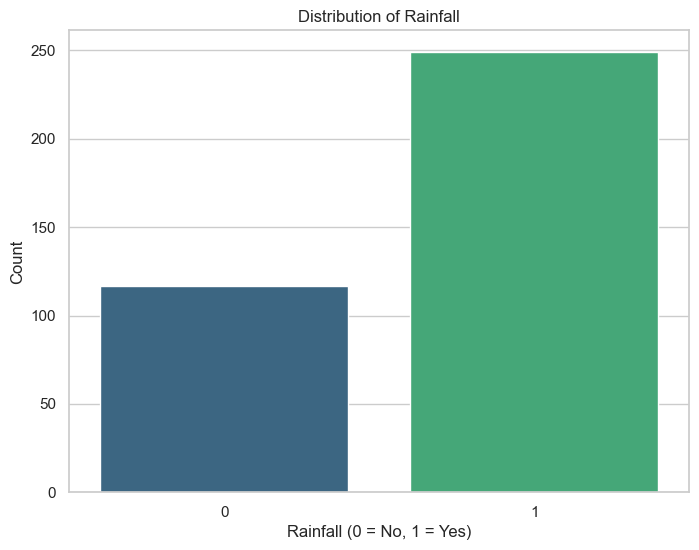

In [48]:
sns.set(style="whitegrid") #setting seaborn style for better aesthetics
plt.figure(figsize=(8, 6))
sns.countplot(x='rainfall', data=data, palette='viridis')
plt.title('Distribution of Rainfall')
plt.xlabel('Rainfall (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()



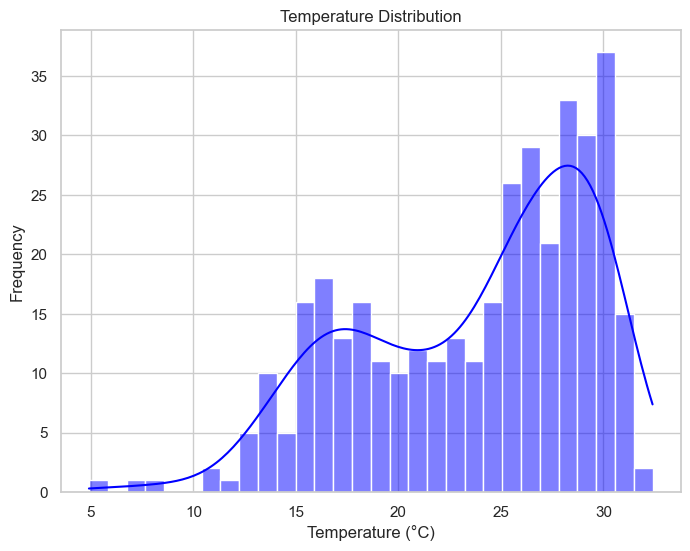

In [49]:
#histogram for temperature
plt.figure(figsize=(8, 6))
sns.histplot(data['temparature'], bins=30, kde=True, color='blue')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

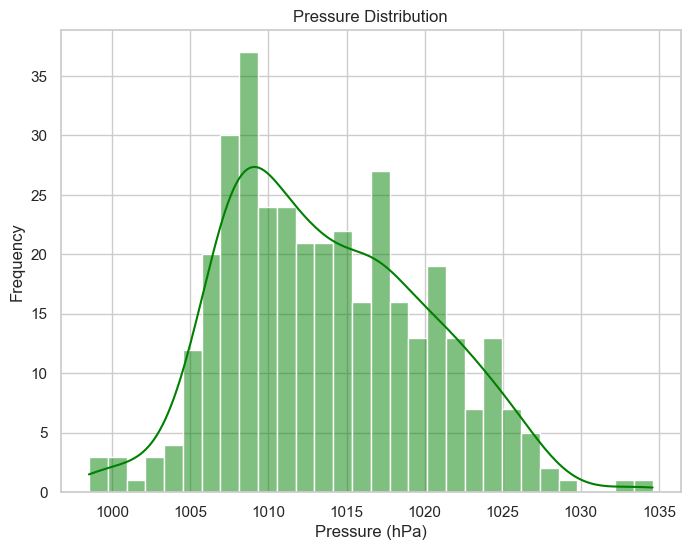

In [50]:
#histogram for pressure
plt.figure(figsize=(8, 6))
sns.histplot(data['pressure'], bins=30, kde=True, color='green')
plt.title('Pressure Distribution')
plt.xlabel('Pressure (hPa)')
plt.ylabel('Frequency')
plt.show()

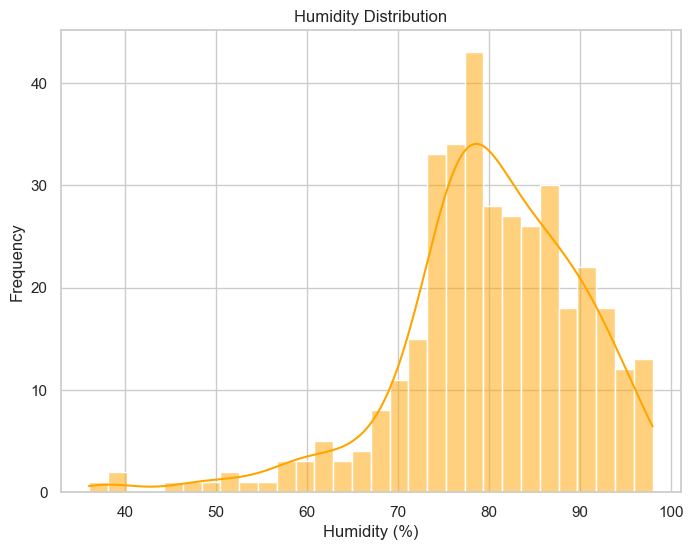

In [51]:
#histogram for humidity
plt.figure(figsize=(8, 6))
sns.histplot(data['humidity'], bins=30, kde=True, color='orange')
plt.title('Humidity Distribution')
plt.xlabel('Humidity (%)')
plt.ylabel('Frequency')
plt.show()

C:\Users\Malsha\AppData\Local\Temp\ipykernel_29356\2060719244.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rainfall', y='humidity', data=data, palette='Set2')


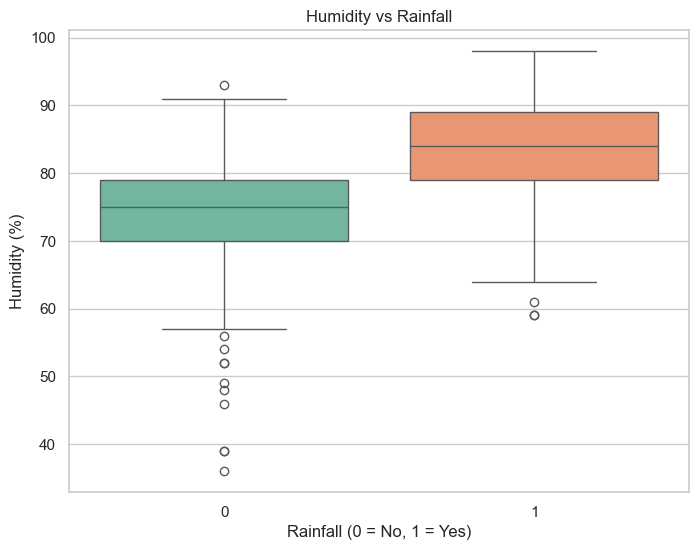

In [52]:
#humidity vs rainfall boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='rainfall', y='humidity', data=data, palette='Set2')
plt.title('Humidity vs Rainfall')
plt.xlabel('Rainfall (0 = No, 1 = Yes)')
plt.ylabel('Humidity (%)')
plt.show()

Humidity is generally higher on rainy days. No-rain days show more variability (some dry outliers), while rainy days cluster tightly around high humidity.


C:\Users\Malsha\AppData\Local\Temp\ipykernel_29356\3969596541.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rainfall', y='temparature', data=data, palette='Set3')


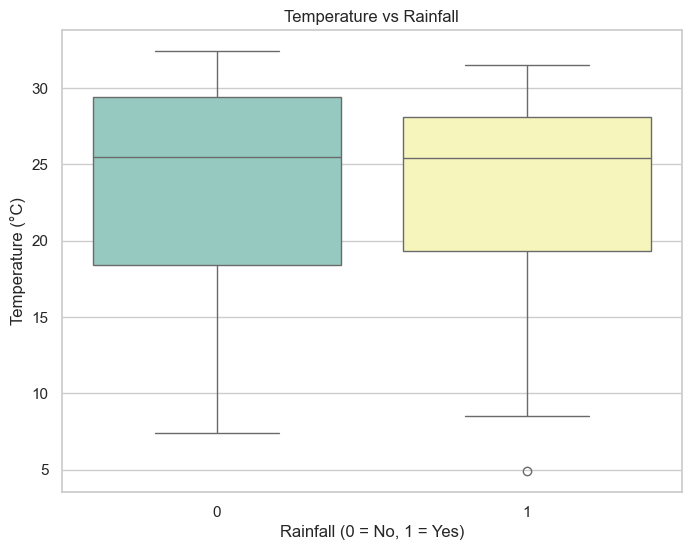

In [53]:
#temparture vs rainfall boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='rainfall', y='temparature', data=data, palette='Set3')
plt.title('Temperature vs Rainfall')
plt.xlabel('Rainfall (0 = No, 1 = Yes)')
plt.ylabel('Temperature (°C)')
plt.show()

In [54]:
data.describe()#statistical summary of numerical columns

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.534153
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.056054
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


When the mean value and median value are very close to each other-> uniform/normal distribution. The difference between them means the distribution is skewed 

In [55]:
data.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

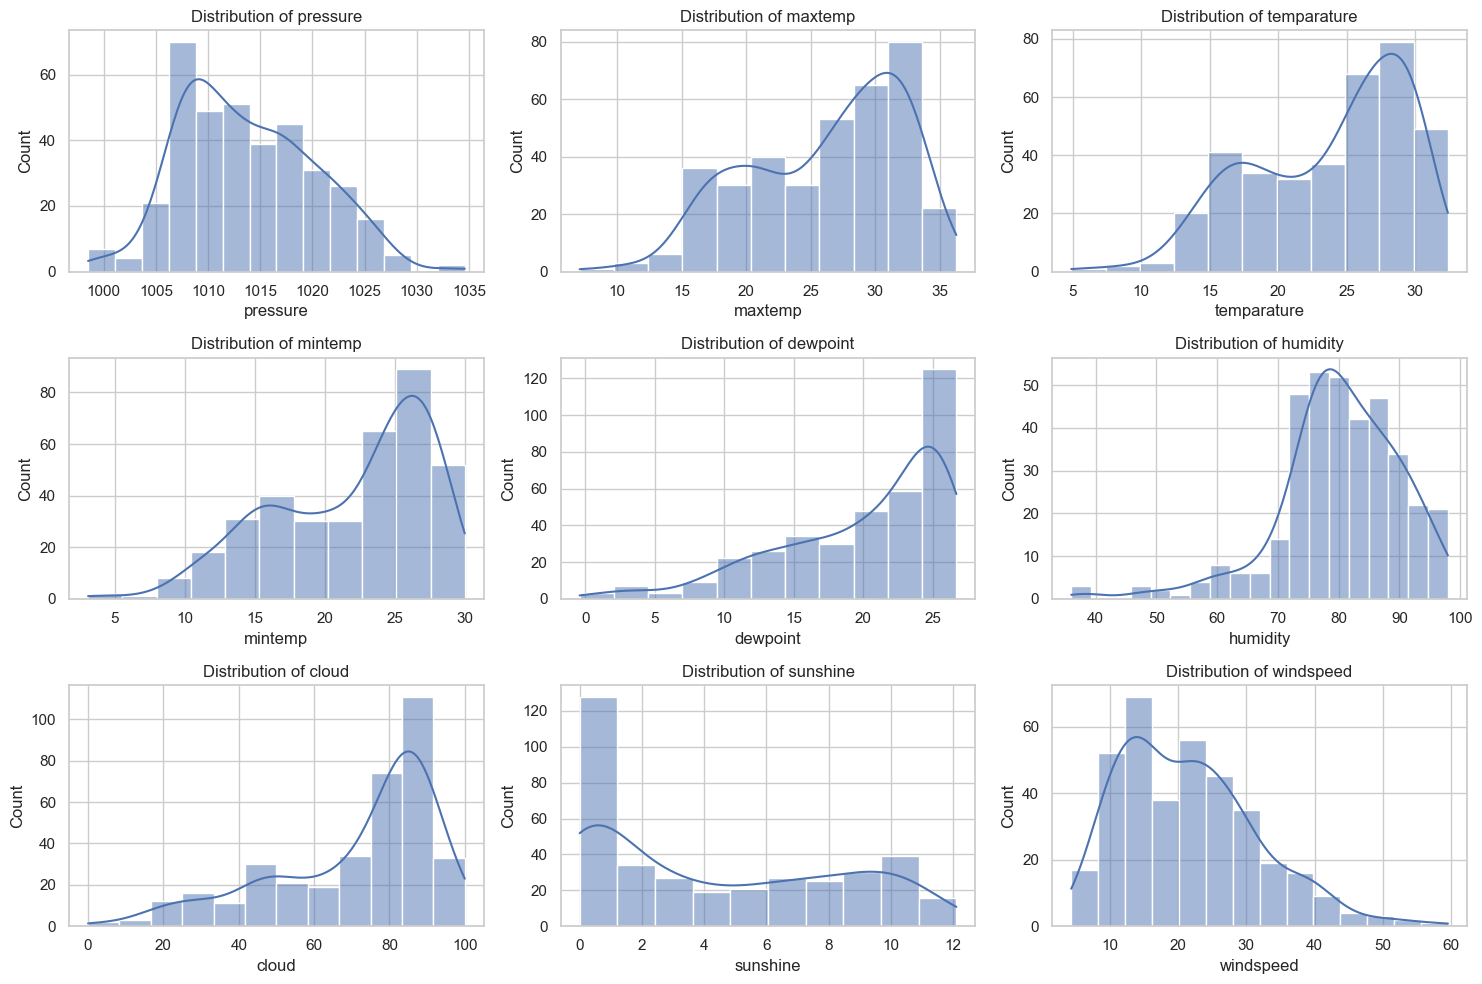

In [56]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud', 'sunshine', 'windspeed'], 1):
  plt.subplot(3, 3, i)
  sns.histplot(data[column], kde=True)
  plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()



most variables are well-behaved, with humidity, cloud, sunshine, and pressure showing clear links to rainfall.

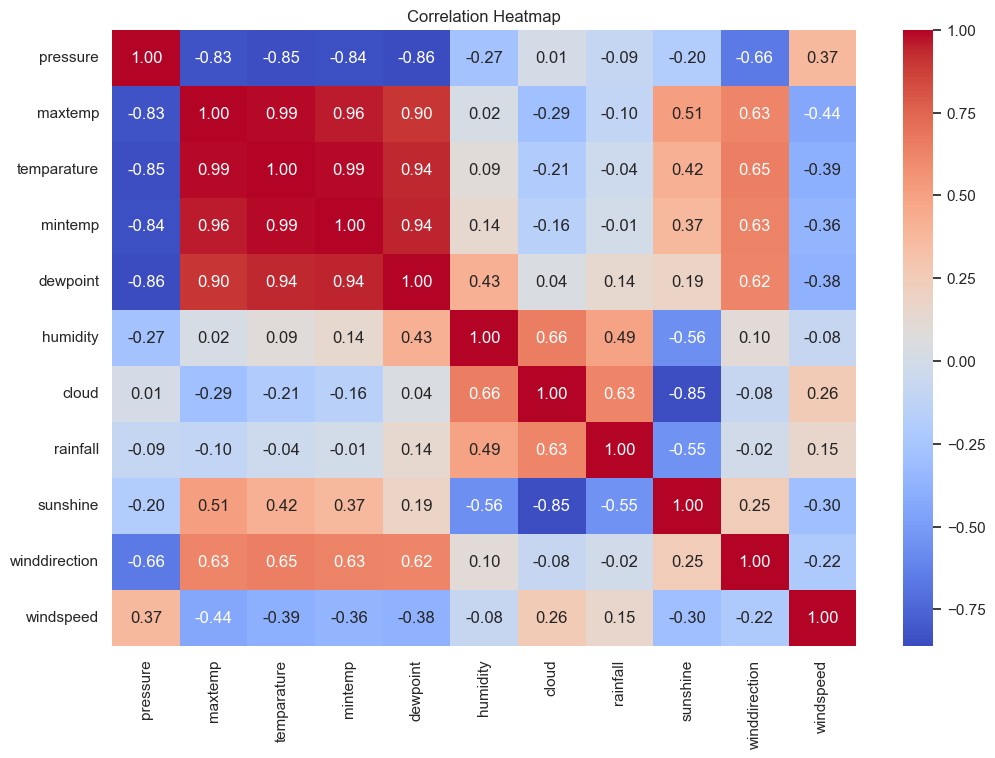

In [57]:
#correlation heatmap
#multi-collinearity check
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,fmt='.2f',cmap='coolwarm')#annot->show values,fmt->decimal places
plt.title('Correlation Heatmap')
plt.show()

+1 ->red → very strong positive relationship
-1 ->blue→ very strong negative relationship
0 ->white → no relationship

- maxtemp,temperature,mintemp,dewpoint show very high correlation(0.9-0.99)
- pressure is sringly negative correlated
- humidity moderately strong correlated with cloud and rainfall
- windspeed is negatively correlated with maxtemp, temperature, mintemp,dewpoint, sunshine and wind direction (-0.3 to +0.3)
- wind direction is moderately string correlated with temperature related features.
- sunshine is strong negatively correlated with cloud and moderately strong negative correlated with rainfall and humidity.
- pressure <-> cloud (0.01),cloud <-> winddirection (–0.08),rainfall <-> pressure (–0.09) have no relationship


So here, multicolinearity exist.

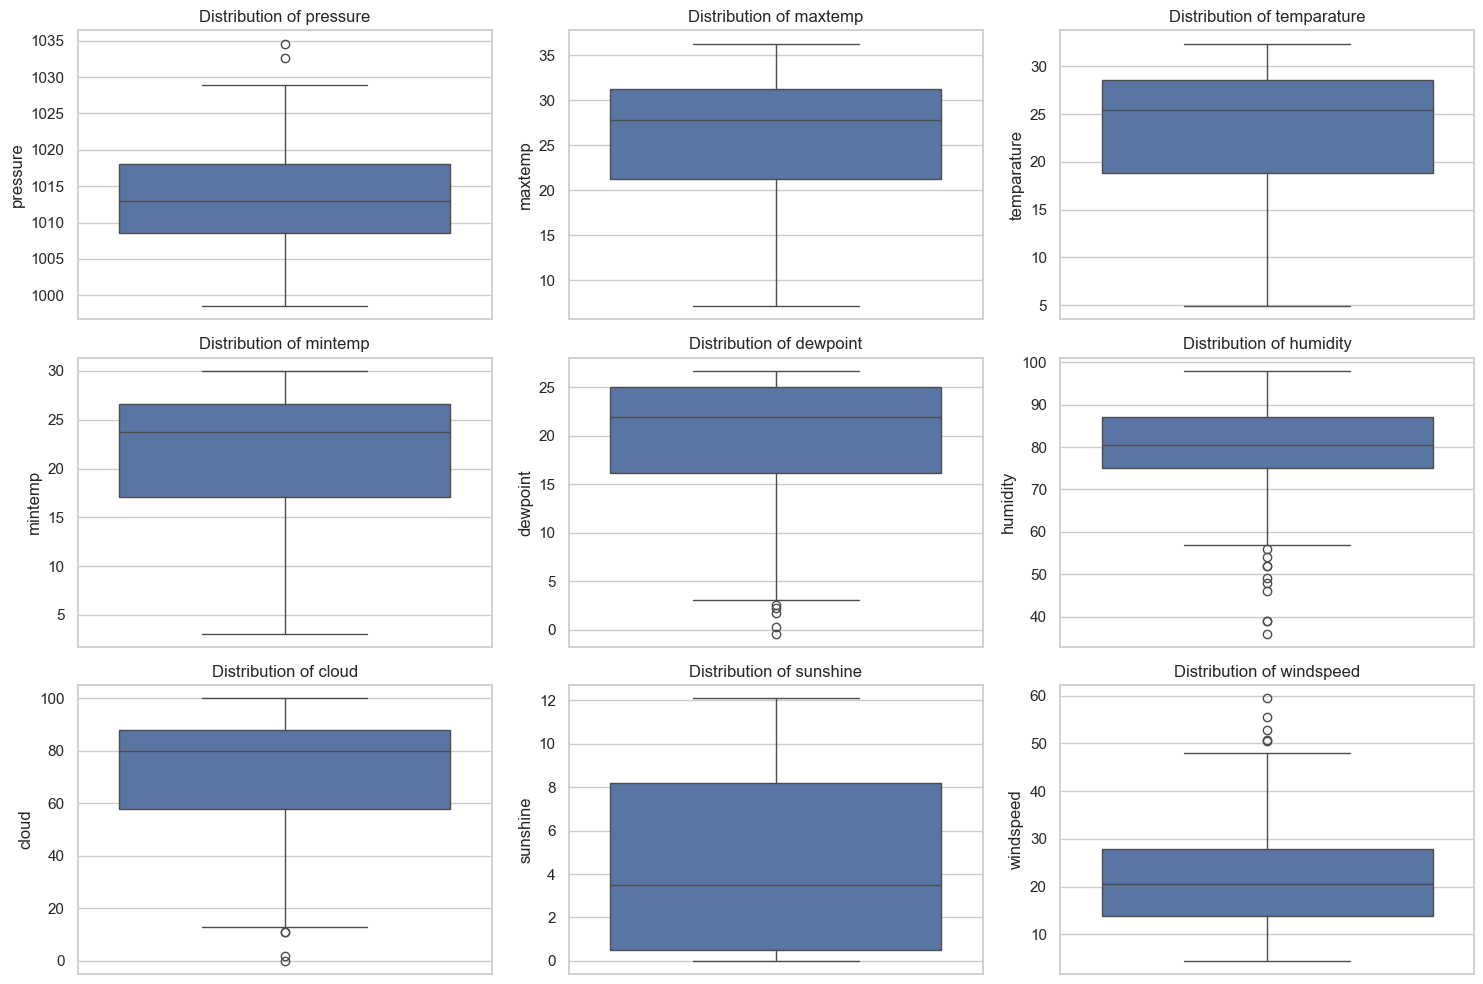

In [58]:
#check outliers using boxplots
plt.figure(figsize=(15, 10))

for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud', 'sunshine', 'windspeed'], 1):
  plt.subplot(3, 3, i)
  sns.boxplot(y=data[column])
  plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()


The boxplots show that most variables follow a fairly stable range, but several features such as dewpoint, humidity, cloud, sunshine, and windspeed contain noticeable outliers. Sunshine and windspeed are more skewed, while temperature-related features are more consistent with only a few low extremes. Overall, the data has natural variability with some irregular weather events causing outliers.

In [60]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


In [63]:
X = data[["maxtemp", "temparature", "mintemp", "dewpoint", "humidity", "cloud", "sunshine"]]
X = add_constant(X)
vif = pd.DataFrame()
vif["feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


       feature          VIF
0        const  1812.491220
1      maxtemp    87.369115
2  temparature   393.425019
3      mintemp    90.416254
4     dewpoint   160.922427
5     humidity    19.943017
6        cloud     4.459909
7     sunshine     5.544951


Temperature-related features (maxtemp, temparature, mintemp, dewpoint) are redundant.



In [64]:
#drop highly correlated columns 
data = data.drop(columns=['maxtemp', 'temparature', 'mintemp',"dewpoint"])
data.head()

,pressure,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,72,49,1,9.3,80.0,26.3
1,1022.0,81,83,1,0.6,50.0,15.3
2,1019.7,95,91,1,0.0,40.0,14.2
3,1018.9,90,88,1,1.0,50.0,16.9
4,1015.9,95,81,1,0.0,40.0,13.7


In [65]:
X = data[["humidity", "cloud", "sunshine"]]
X = add_constant(X)
vif = pd.DataFrame()
vif["feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

    feature         VIF
0     const  127.759142
1  humidity    1.753993
2     cloud    4.269566
3  sunshine    3.568479


In [66]:
print(data["rainfall"].value_counts()  )

rainfall
1    249
0    117
Name: count, dtype: int64


In [71]:
#separate majority and minority classes
df_majority = data[data.rainfall==1]
df_minority = data[data.rainfall==0]


In [72]:
print(df_majority.shape)
print(df_minority.shape)

(249, 7)
(117, 7)


In [73]:
#reducing the number of samples in the majority class to balance the dataset.
df_majority_downsampled = resample(df_majority,
                                 replace=False,    # sample without replacement
                                 n_samples=len(df_minority), # to match minority class
                                 random_state=42) # reproducible results

In [74]:
df_majority_downsampled.shape

(117, 7)

In [75]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled.head()

,pressure,humidity,cloud,rainfall,sunshine,winddirection,windspeed
188,1005.9,77,53,1,10.5,270.0,11.3
9,1017.5,85,91,1,0.0,70.0,37.7
137,1012.3,80,86,1,0.3,80.0,39.5
89,1018.3,79,89,1,2.4,40.0,14.8
157,1008.8,91,80,1,2.2,20.0,11.2


In [76]:
df_downsampled.shape

(234, 7)

In [77]:
#shuffling the dataset -> to avoid order bias and ensure the model learns properly.
df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)
df_downsampled.head()

,pressure,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1022.2,78,90,1,0.0,30.0,28.5
1,1013.4,69,17,0,10.5,70.0,12.4
2,1006.1,74,27,0,10.8,220.0,8.7
3,1007.6,85,84,1,1.8,70.0,34.8
4,1021.2,66,18,0,10.1,20.0,24.4


In [78]:
df_downsampled['rainfall'].value_counts()

rainfall
1    117
0    117
Name: count, dtype: int64

In [79]:
#split the data into features and target variable as X and y
X = df_downsampled.drop(columns=['rainfall'])
y = df_downsampled['rainfall']

In [80]:
print(X)

     pressure  humidity  cloud  sunshine  winddirection  windspeed
0      1022.2        78     90       0.0           30.0       28.5
1      1013.4        69     17      10.5           70.0       12.4
2      1006.1        74     27      10.8          220.0        8.7
3      1007.6        85     84       1.8           70.0       34.8
4      1021.2        66     18      10.1           20.0       24.4
..        ...       ...    ...       ...            ...        ...
229    1008.1        86     75       5.7           20.0        9.5
230    1010.1        91     89       0.0           70.0       31.8
231    1020.6        91     88       0.3           50.0       24.4
232    1008.3        74     29       5.7           10.0        4.4
233    1005.0        87     82       2.2          160.0       12.6

[234 rows x 6 columns]


In [81]:
print(y)

0      1
1      0
2      0
3      1
4      0
      ..
229    1
230    1
231    1
232    0
233    1
Name: rainfall, Length: 234, dtype: int64


In [82]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   



**Logistic regression**

In [88]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [90]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


[[14 10]
 [ 5 18]]
              precision    recall  f1-score   support

           0       0.74      0.58      0.65        24
           1       0.64      0.78      0.71        23

    accuracy                           0.68        47
   macro avg       0.69      0.68      0.68        47
weighted avg       0.69      0.68      0.68        47

Accuracy: 0.6808510638297872


**Random Forest**

**Model training**

In [91]:
#Base rf model
base_rf_model = RandomForestClassifier(random_state=42)
base_rf_model.fit(X_train, y_train)
y_pred_base = base_rf_model.predict(X_test)


In [92]:
print("Base RF Test Accuracy:", accuracy_score(y_test, y_pred_base))
print("Base RF Classification Report:\n", classification_report(y_test, y_pred_base))
print("Base RF Confusion Matrix:\n", confusion_matrix(y_test, y_pred_base))

Base RF Test Accuracy: 0.7872340425531915
Base RF Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.78        24
           1       0.76      0.83      0.79        23

    accuracy                           0.79        47
   macro avg       0.79      0.79      0.79        47
weighted avg       0.79      0.79      0.79        47

Base RF Confusion Matrix:
 [[18  6]
 [ 4 19]]


In [96]:
rf_model = RandomForestClassifier(random_state=42)

param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    "max_features": ['sqrt', 'log2']
}

random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=20,              # only test 20 random combos
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=2,
    scoring='accuracy'
)

random_search.fit(X_train, y_train)
print(random_search.best_params_)
print(random_search.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}
0.8081081081081083


now the avarage accuracy is 81%, this explains it improved performance.

In [97]:
best_rf_model = random_search.best_estimator_
print("Best Hyperparameters for RF:", random_search.best_params_)

Best Hyperparameters for RF: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}


In [98]:
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-validation scores: [0.68421053 0.81578947 0.86486486 0.75675676 0.91891892]
Mean CV Accuracy: 0.8081081081081083


         feature  importance
3       sunshine    0.300931
2          cloud    0.279275
1       humidity    0.141884
5      windspeed    0.120724
0       pressure    0.108456
4  winddirection    0.048731


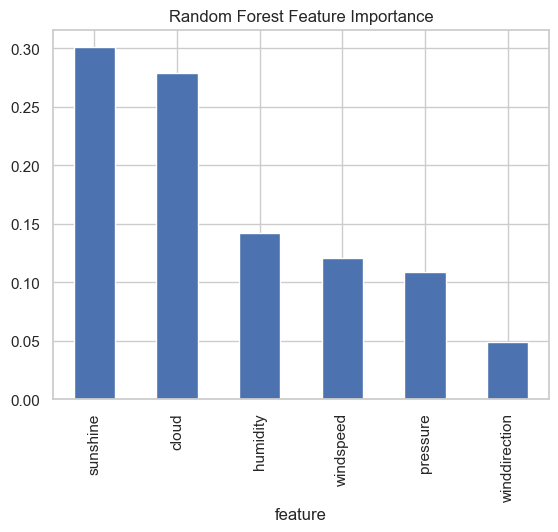

In [99]:
importances = best_rf_model.feature_importances_
feat_imp = pd.DataFrame({"feature": X_train.columns, "importance": importances})
feat_imp = feat_imp.sort_values("importance", ascending=False)

print(feat_imp)

# Optional: visualize
feat_imp.plot(kind="bar", x="feature", y="importance", legend=False)
plt.title("Random Forest Feature Importance")
plt.show()


In [ ]:
#test set evaluation
y_test_pred = best_rf_model.predict(X_test)
print("Test Set Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))   
print("test set confution matrix:\n", confusion_matrix(y_test, y_test_pred))

Test Set Accuracy: 0.7446808510638298
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.72      0.78      0.75        23

    accuracy                           0.74        47
   macro avg       0.75      0.75      0.74        47
weighted avg       0.75      0.74      0.74        47

test set confution matrix:
 [[17  7]
 [ 5 18]]


*prediction on unknown data*

In [100]:
print(X.head())

   pressure  humidity  cloud  sunshine  winddirection  windspeed
0    1022.2        78     90       0.0           30.0       28.5
1    1013.4        69     17      10.5           70.0       12.4
2    1006.1        74     27      10.8          220.0        8.7
3    1007.6        85     84       1.8           70.0       34.8
4    1021.2        66     18      10.1           20.0       24.4


In [101]:
X_train.columns

Index(['pressure', 'humidity', 'cloud', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [105]:
input_data = (1015.9, 19.9, 95, 81, 40.0, 13.7) #example input data
input_df = pd.DataFrame([input_data], columns=X_train.columns)
input_df


,pressure,humidity,cloud,sunshine,winddirection,windspeed
0,1015.9,19.9,95,81,40.0,13.7


**SVM**

In [115]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)   

In [116]:
#SVM model training and hyperpatameter tuning
svm_model = SVC(random_state=42)
parameter_grid_svm = {
    'kernel': ['rbf','linear'],
    'C': [0.1,1,10,100],
    'gamma':['scale',0.01,0.1,1]
}
#hyperparameter tuning using GridSearchCV
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=parameter_grid_svm,
                           cv=5, n_jobs=-1, verbose=2,scoring='accuracy')
grid_search_svm.fit(X_train_scaled, y_train)
 

Fitting 5 folds for each of 32 candidates, totalling 160 fits


,estimator,SVC(random_state=42)
,param_grid,"{'C': [0.1, 1, ...], 'gamma': ['scale', 0.01, ...], 'kernel': ['rbf', 'linear']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,0.1


In [109]:
best_svm_model = grid_search_svm.best_estimator_
print("Best Hyperparameters for SVM:", grid_search_svm.best_params_)

Best Hyperparameters for SVM: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}


In [110]:
print(f"Best cross-validation score (Accuracy): {grid_search_svm.best_score_:.4f}")

Best cross-validation score (Accuracy): 0.8135


model evaluation

In [117]:
#cross validation on the best model
cv_scores_svm =cross_val_score(best_svm_model,X_train_scaled,y_train,cv=5,scoring="accuracy")
print("Cross validation score:",cv_scores_svm)
print(f"Mean CV Accuracy: {np.mean(cv_scores_svm):.4f}")


Cross validation score: [0.68421053 0.81578947 0.86486486 0.83783784 0.86486486]
Mean CV Accuracy: 0.8135


In [112]:
#test set evaluation
y_test_pred_svm = best_svm_model.predict(X_test_scaled)
print("Test Set Accuracy:", accuracy_score(y_test, y_test_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_test_pred_svm))   
print("test set confution matrix:\n", confusion_matrix(y_test, y_test_pred_svm))

Test Set Accuracy: 0.6595744680851063
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.54      0.62        24
           1       0.62      0.78      0.69        23

    accuracy                           0.66        47
   macro avg       0.67      0.66      0.66        47
weighted avg       0.67      0.66      0.65        47

test set confution matrix:
 [[13 11]
 [ 5 18]]


Based on the evaluation metrics, the Random Forest model performs better than the SVM model. Random Forest achieves higher accuracy (0.74 vs. 0.66), higher precision, recall, and F1-scores for both classes. Its confusion matrix also shows fewer misclassifications of the negative class compared to SVM. Overall, the Random Forest model demonstrates stronger and more balanced predictive performance on the test set, making it the better choice for this classification task.

**XGBoost**

In [120]:
xgb_model = XGBClassifier(
    objective='binary:logistic',   # since rainfall is binary (Rain/No Rain)
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'          # avoids warning
)

In [121]:
param_grid_xgb = {
    'n_estimators': [50, 100, 200],      # number of trees
    'max_depth': [3, 5, 7],              # tree depth
    'learning_rate': [0.01, 0.1, 0.2],   # step size shrinkage
    'subsample': [0.8, 1.0],             # fraction of samples per tree
    'colsample_bytree': [0.8, 1.0]       # fraction of features per tree
}

In [122]:
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)

grid_search_xgb.fit(X_train, y_train)

best_xgb_model = grid_search_xgb.best_estimator_
print("Best Hyperparameters for XGBoost:", grid_search_xgb.best_params_)
print(f"Best CV Accuracy: {grid_search_xgb.best_score_:.4f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Best CV Accuracy: 0.8132


c:\Users\Malsha\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [10:56:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [123]:
cv_scores_xgb = cross_val_score(best_xgb_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores_xgb)
print("Mean CV Accuracy:", cv_scores_xgb.mean())

c:\Users\Malsha\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [10:57:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Malsha\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [10:57:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Malsha\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [10:57:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Malsha\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [10:57:57] WARNING: C:\a

Cross-validation scores: [0.73684211 0.78947368 0.83783784 0.83783784 0.86486486]
Mean CV Accuracy: 0.8133712660028449


In [125]:
y_test_pred_xgb = best_xgb_model.predict(X_test)

print("Test Set Accuracy:", accuracy_score(y_test, y_test_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_test_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_xgb))

Test Set Accuracy: 0.7659574468085106
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.75      0.77        24
           1       0.75      0.78      0.77        23

    accuracy                           0.77        47
   macro avg       0.77      0.77      0.77        47
weighted avg       0.77      0.77      0.77        47

Confusion Matrix:
 [[18  6]
 [ 5 18]]


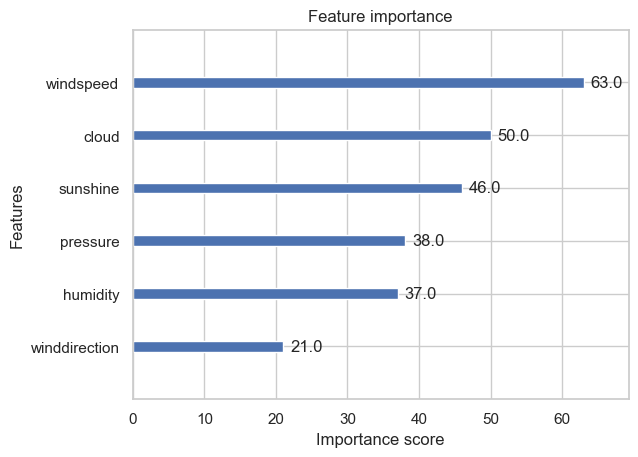

In [124]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(best_xgb_model)
plt.show()

In [127]:

# Predictions
y_pred_xgb = best_xgb_model.predict(X_test)
y_pred_svm = best_svm_model.predict(X_test_scaled)
y_pred_rf  = best_rf_model.predict(X_test)
y_pred_log = log_reg.predict(X_test_scaled)

# Function to get metrics
def get_metrics(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1-score": report["weighted avg"]["f1-score"]
    }

# Collect results
results = {
    "XGBoost": get_metrics(y_test, y_pred_xgb),
    "SVM": get_metrics(y_test, y_pred_svm),
    "Random Forest": get_metrics(y_test, y_pred_rf),
    "Logistic Regression": get_metrics(y_test, y_pred_log)
}

# Convert to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

                     Accuracy  Precision    Recall  F1-score
XGBoost              0.765957   0.766651  0.765957  0.765957
SVM                  0.659574   0.672536  0.659574  0.654898
Random Forest        0.765957   0.779555  0.765957  0.763823
Logistic Regression  0.680851   0.690849  0.680851  0.677940


In [113]:
 #save model and feature names to a picke name
model_data = {"model": best_rf_model,"feature names":X.columns.tolist()}

with open("model_RF.pkl","wb") as file:
    pickle.dump(model_data,file)

In [ ]:
prediction = best_rf_model.predict(input_df)
print("prediction result:","Rainfall" if prediction[0]==1 else "No Rainfall" )